Mounted at /content/drive
Đang load dữ liệu...
Kích thước gốc: (82404, 1280)
Đang chạy PCA để giảm sơ bộ...
Đang chạy t-SNE để đưa về 2D...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 5000 samples in 0.312s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.243240
[t-SNE] KL divergence after 300 iterations: 0.268321


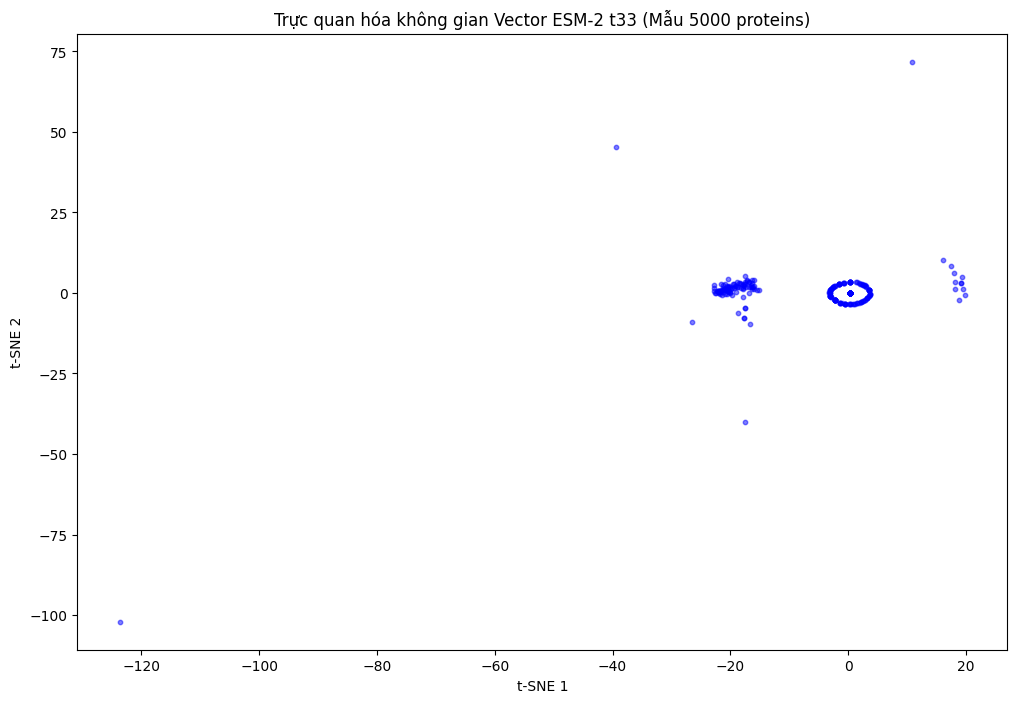

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from google.colab import drive

# 1. Kết nối Google Drive
drive.mount('/content/drive')

# 2. Đường dẫn file (Lưu ý: kiểm tra lại đúng đường dẫn thư mục của bạn)
# Dựa trên ảnh của bạn: My Drive > CAFA6_Embeddings
base_path = '/content/drive/MyDrive/CAFA6_Embeddings/'
train_emb_path = base_path + 'train_embeddings.npy'

# 3. Load dữ liệu
print("Đang load dữ liệu...")
embeddings = np.load(train_emb_path)

print(f"Kích thước gốc: {embeddings.shape}")
# ESM-2 t33 thường là (số_lượng_protein, 1280)

# 4. Lấy mẫu (Sampling) - QUAN TRỌNG
# File của bạn >200MB, chạy t-SNE trên toàn bộ sẽ rất lâu và tốn RAM.
# Hãy thử trước với 5,000 mẫu ngẫu nhiên.
n_samples = 5000
if embeddings.shape[0] > n_samples:
    indices = np.random.choice(embeddings.shape[0], n_samples, replace=False)
    data_subset = embeddings[indices]
else:
    data_subset = embeddings

# 5. Giảm chiều dữ liệu (PCA -> t-SNE)
# Dùng PCA giảm xuống 50 chiều trước để t-SNE chạy nhanh hơn (kỹ thuật chuẩn)
print("Đang chạy PCA để giảm sơ bộ...")
pca = PCA(n_components=50)
pca_result = pca.fit_transform(data_subset)

print("Đang chạy t-SNE để đưa về 2D...")
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)

# 6. Vẽ biểu đồ
plt.figure(figsize=(12, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
            alpha=0.5, s=10, c='blue') # Hiện tại để màu xanh vì chưa có nhãn (labels)
plt.title(f'Trực quan hóa không gian Vector ESM-2 t33 (Mẫu {n_samples} proteins)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

Đang load Train và Test...
Train shape: (82404, 1280)
Test shape:  (224309, 1280)
Đang chạy PCA...
Đang chạy t-SNE (kết hợp)...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.003s...
[t-SNE] Computed neighbors for 6000 samples in 0.371s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.373772
[t-SNE] KL divergence after 500 iterations: 0.173343


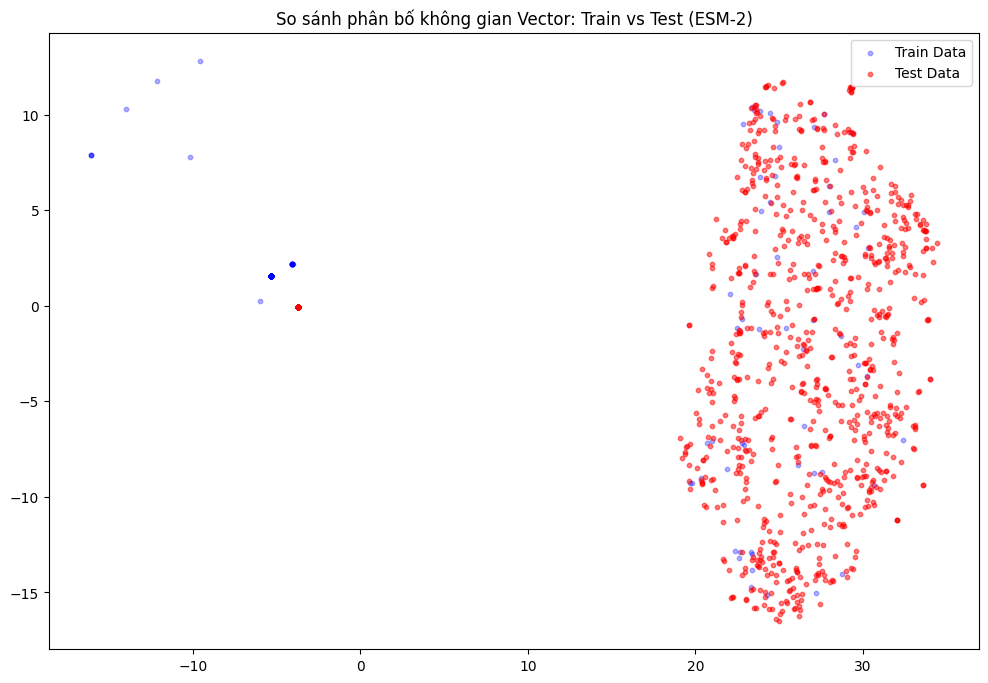

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from google.colab import drive

# 1. Load dữ liệu (Đã mount drive rồi thì không cần mount lại)
base_path = '/content/drive/MyDrive/CAFA6_Embeddings/'

print("Đang load Train và Test...")
train_emb = np.load(base_path + 'train_embeddings.npy')
test_emb = np.load(base_path + 'test_embeddings.npy')

print(f"Train shape: {train_emb.shape}")
print(f"Test shape:  {test_emb.shape}")

# 2. Lấy mẫu để cân bằng (Lấy 3000 mẫu mỗi loại để so sánh)
n_samples = 3000

# Lấy mẫu Train
idx_train = np.random.choice(train_emb.shape[0], n_samples, replace=False)
sub_train = train_emb[idx_train]

# Lấy mẫu Test
# (Kiểm tra nếu file test nhỏ hơn 3000 thì lấy hết)
if test_emb.shape[0] > n_samples:
    idx_test = np.random.choice(test_emb.shape[0], n_samples, replace=False)
    sub_test = test_emb[idx_test]
else:
    sub_test = test_emb

# 3. Gộp dữ liệu và tạo nhãn màu (0: Train, 1: Test)
combined_data = np.vstack([sub_train, sub_test])
labels = np.array([0] * len(sub_train) + [1] * len(sub_test))

# 4. Giảm chiều (PCA -> t-SNE)
print("Đang chạy PCA...")
pca = PCA(n_components=50)
pca_result = pca.fit_transform(combined_data)

print("Đang chạy t-SNE (kết hợp)...")
# Đã sửa 'n_iter' thành 'max_iter' để hết cảnh báo
tsne = TSNE(n_components=2, verbose=1, perplexity=40, max_iter=500)
tsne_results = tsne.fit_transform(pca_result)

# 5. Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 8))

# Vẽ điểm Train (Màu xanh dương, mờ hơn chút để làm nền)
plt.scatter(tsne_results[labels==0, 0], tsne_results[labels==0, 1],
            c='blue', label='Train Data', alpha=0.3, s=10)

# Vẽ điểm Test (Màu đỏ, đậm hơn để nổi bật)
plt.scatter(tsne_results[labels==1, 0], tsne_results[labels==1, 1],
            c='red', label='Test Data', alpha=0.5, s=10)

plt.title('So sánh phân bố không gian Vector: Train vs Test (ESM-2)')
plt.legend()
plt.show()

--- Đang xử lý tập TRAIN ---
--- Đang xử lý tập TEST ---
Đã lấy mẫu: Train ((3000, 1280)) - Test ((3000, 1280))
Đang chạy PCA giảm xuống 50 chiều...
Đang chạy t-SNE (quá trình này mất khoảng 1-2 phút)...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.001s...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 6000 samples in 0.907s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.459713
[t-SNE] KL divergence after 1000 iterations: 0.161376


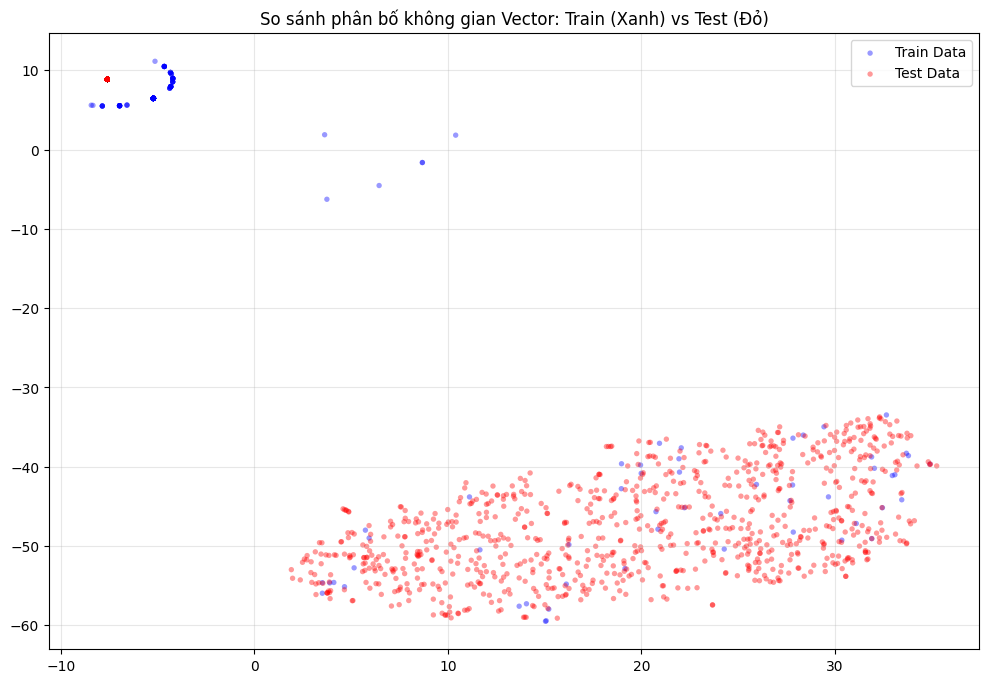

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# Thư viện này để giải phóng RAM sau khi dùng xong
import gc

# 1. Cấu hình đường dẫn (như trong ảnh bạn gửi)
base_path = '/content/drive/MyDrive/CAFA6_Embeddings/'

# 2. Load và lấy mẫu dữ liệu TRAIN
print("--- Đang xử lý tập TRAIN ---")
train_all = np.load(base_path + 'train_embeddings.npy')
# Lấy ngẫu nhiên 3000 mẫu từ tập Train
idx_train = np.random.choice(train_all.shape[0], 3000, replace=False)
train_sample = train_all[idx_train]
del train_all # Xóa biến lớn để giải phóng RAM ngay lập tức
gc.collect()

# 3. Load và lấy mẫu dữ liệu TEST
print("--- Đang xử lý tập TEST ---")
test_all = np.load(base_path + 'test_embeddings.npy')
# Lấy ngẫu nhiên 3000 mẫu từ tập Test
# (Kiểm tra xem file test có đủ 3000 mẫu không, dù file của bạn rất lớn nhưng cứ check cho an toàn)
n_test_samples = 3000
if test_all.shape[0] < n_test_samples:
    n_test_samples = test_all.shape[0]

idx_test = np.random.choice(test_all.shape[0], n_test_samples, replace=False)
test_sample = test_all[idx_test]
del test_all # Xóa biến lớn giải phóng RAM
gc.collect()

print(f"Đã lấy mẫu: Train ({train_sample.shape}) - Test ({test_sample.shape})")

# 4. Gộp dữ liệu để chạy t-SNE chung
combined_data = np.vstack([train_sample, test_sample])
# Tạo nhãn màu: 0 là Train, 1 là Test
labels = np.array([0] * len(train_sample) + [1] * len(test_sample))

# 5. Giảm chiều dữ liệu (PCA -> t-SNE)
print("Đang chạy PCA giảm xuống 50 chiều...")
pca = PCA(n_components=50)
pca_result = pca.fit_transform(combined_data)

print("Đang chạy t-SNE (quá trình này mất khoảng 1-2 phút)...")
# Tăng perplexity lên 50 để thử phá vỡ cấu trúc hình tròn nếu có
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(pca_result)

# 6. Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 8))

# Vẽ điểm Train (Màu Xanh Dương)
plt.scatter(tsne_results[labels==0, 0], tsne_results[labels==0, 1],
            c='blue', label='Train Data', alpha=0.4, s=15, edgecolors='none')

# Vẽ điểm Test (Màu Đỏ) - Vẽ sau để nằm đè lên trên giúp dễ nhìn
plt.scatter(tsne_results[labels==1, 0], tsne_results[labels==1, 1],
            c='red', label='Test Data', alpha=0.4, s=15, edgecolors='none')

plt.title('So sánh phân bố không gian Vector: Train (Xanh) vs Test (Đỏ)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

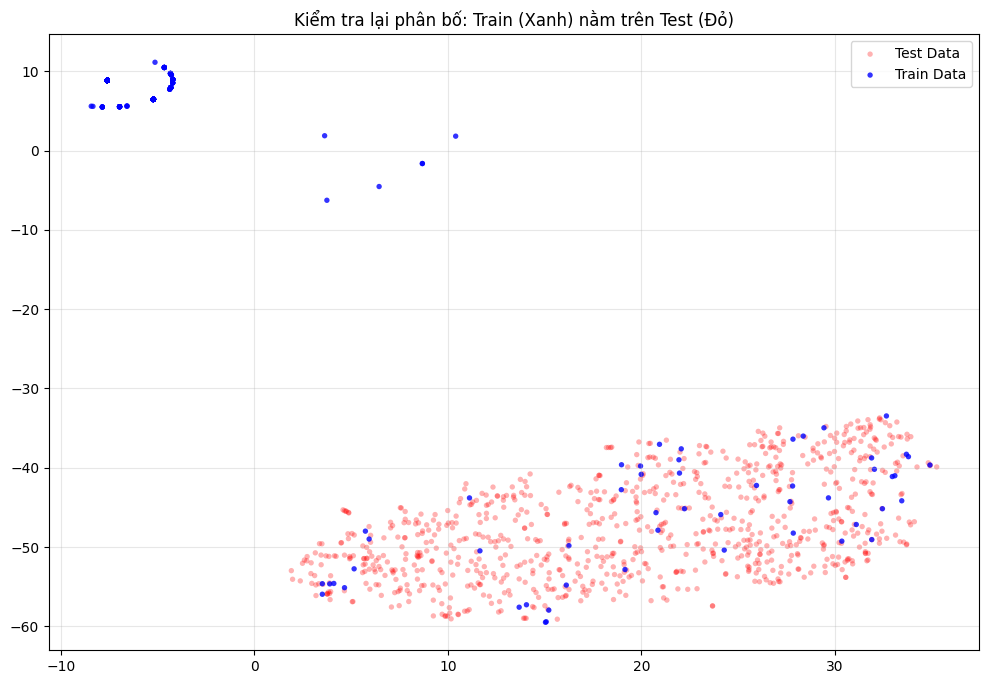

In [4]:
import matplotlib.pyplot as plt

# Sử dụng lại biến tsne_results và labels từ bước trước
# Nếu bạn đã lỡ tắt Colab, bạn cần chạy lại toàn bộ code cũ trước.

plt.figure(figsize=(12, 8))

# 1. Vẽ Test (Đỏ) trước làm nền
plt.scatter(tsne_results[labels==1, 0], tsne_results[labels==1, 1],
            c='red', label='Test Data', alpha=0.3, s=15, edgecolors='none')

# 2. Vẽ Train (Xanh) sau để nó nổi lên trên
plt.scatter(tsne_results[labels==0, 0], tsne_results[labels==0, 1],
            c='blue', label='Train Data', alpha=0.8, s=15, edgecolors='none')
            # alpha=0.8 để xanh đậm hơn, dễ nhìn hơn

plt.title('Kiểm tra lại phân bố: Train (Xanh) nằm trên Test (Đỏ)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
import numpy as np
import pandas as pd
import gc # Thư viện dọn rác bộ nhớ

base_path = '/content/drive/MyDrive/CAFA6_Embeddings/'

# ==========================================
# 1. TẠO BẢNG CHO TẬP TRAIN (Full)
# ==========================================
print("--- Đang tạo bảng TRAIN ---")
train_emb = np.load(base_path + 'train_embeddings.npy')
train_ids = np.load(base_path + 'train_ids.npy')

# Tạo DataFrame
df_train = pd.DataFrame(train_emb)
# Gán Index là ID của Protein (như code mẫu bạn gửi)
df_train.index = train_ids

# Đặt tên cột cho đẹp (từ dim_0 đến dim_1279)
df_train.columns = [f'dim_{i}' for i in range(df_train.shape[1])]

print(f"Kích thước bảng Train: {df_train.shape}")
print("5 dòng đầu tiên của tập TRAIN:")
display(df_train.head()) # Lệnh này hiển thị bảng đẹp trong Colab

# ==========================================
# 2. TẠO BẢNG CHO TẬP TEST (Mẫu thử 100 dòng)
# ==========================================
print("\n--- Đang tạo bảng TEST (Demo 100 dòng) ---")
# Dùng mmap_mode='r' để không load hết 500MB vào RAM
test_emb_all = np.load(base_path + 'test_embeddings.npy', mmap_mode='r')
test_ids_all = np.load(base_path + 'test_ids.npy')

# Chỉ lấy 100 dòng đầu
df_test_sample = pd.DataFrame(test_emb_all[:100])
df_test_sample.index = test_ids_all[:100]
df_test_sample.columns = [f'dim_{i}' for i in range(df_test_sample.shape[1])]

print("5 dòng đầu tiên của tập TEST (Mẫu):")
display(df_test_sample.head())

# ==========================================
# 3. DỌN DẸP RAM (Quan trọng!)
# ==========================================
# Nếu bạn chỉ xem xong mà không dùng bảng này để train ngay, hãy xóa nó đi
# del df_train
# gc.collect()

--- Đang tạo bảng TRAIN ---
Kích thước bảng Train: (82404, 1280)
5 dòng đầu tiên của tập TRAIN:


/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_1270,dim_1271,dim_1272,dim_1273,dim_1274,dim_1275,dim_1276,dim_1277,dim_1278,dim_1279
A0A0C5B5G6,0.122986,0.049225,0.090332,0.029846,-0.088623,-0.078430,-0.116638,0.295166,0.112671,0.045746,...,-0.039276,-0.027145,-0.097107,0.094604,0.026520,0.128052,0.035828,0.120728,-0.079102,0.047943
A0JNW5,-0.007771,-0.009636,-0.046478,0.101929,-0.141846,-0.092712,0.078064,-0.047607,-0.065735,0.159302,...,0.097839,0.022186,-0.140503,0.059052,-0.018387,-0.038025,-0.005726,-0.081909,0.053802,0.077087
A0JP26,-0.005779,-0.064392,0.016022,0.012589,-0.007004,-0.101257,0.047028,0.036591,-0.018677,-0.011703,...,0.010529,0.038574,-0.119263,-0.019196,-0.001450,0.029861,0.027878,-0.032684,-0.007080,-0.042114
A0PK11,-0.072693,0.047516,-0.028625,-0.054810,0.006405,0.005882,0.103027,0.006348,0.018692,0.006161,...,0.084473,-0.017929,-0.061279,-0.022018,-0.001500,0.077209,0.067200,0.006336,-0.079102,0.067322
A1A4S6,0.040741,-0.078125,-0.088440,0.059845,-0.258789,-0.065247,0.134644,-0.076477,-0.070435,0.145630,...,-0.020508,-0.092163,-0.108093,0.028549,0.031586,-0.067078,-0.007523,-0.191406,0.047882,0.104431



--- Đang tạo bảng TEST (Demo 100 dòng) ---
5 dòng đầu tiên của tập TEST (Mẫu):


/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_1270,dim_1271,dim_1272,dim_1273,dim_1274,dim_1275,dim_1276,dim_1277,dim_1278,dim_1279
A0A0C5B5G6,0.123047,0.049194,0.090454,0.029831,-0.088562,-0.078430,-0.116760,0.295166,0.112732,0.045837,...,-0.039124,-0.027084,-0.097168,0.094543,0.026535,0.128052,0.035828,0.120728,-0.079224,0.047943
A0A1B0GTW7,0.032776,-0.109802,0.023026,0.068604,0.009865,-0.017380,0.017578,0.103027,0.039856,0.185669,...,-0.038788,0.071594,-0.165283,0.018280,-0.060852,-0.036926,0.052185,-0.105896,-0.033752,-0.030411
A0JNW5,-0.007732,-0.009697,-0.046448,0.101868,-0.141846,-0.092773,0.078125,-0.047638,-0.065613,0.159424,...,0.097839,0.022110,-0.140381,0.058960,-0.018402,-0.037964,-0.005676,-0.081909,0.053741,0.077087
A0JP26,-0.005779,-0.064331,0.016022,0.012627,-0.007008,-0.101257,0.047028,0.036591,-0.018631,-0.011703,...,0.010536,0.038574,-0.119324,-0.019135,-0.001493,0.029861,0.027893,-0.032684,-0.007065,-0.042023
A0PK11,-0.072632,0.047485,-0.028610,-0.054810,0.006454,0.005920,0.103027,0.006241,0.018509,0.006092,...,0.084534,-0.018127,-0.061279,-0.022034,-0.001505,0.077271,0.067200,0.006275,-0.078979,0.067383


In [14]:
%%time
import pandas as pd

path_terms = '/content/drive/MyDrive/CAFA6/Train/train_terms.tsv'

try:
    print("Đang đọc file train_terms.tsv...")
    train_terms = pd.read_csv(path_terms, sep="\t")

    # 1. Kiểm tra kích thước (Số dòng, Số cột)
    print(f"Kích thước file nhãn: {train_terms.shape}")

    # 2. Xem 2 dòng đầu để hiểu cấu trúc
    print("Mẫu dữ liệu:")
    display(train_terms.head(2))

    # 3. Đếm tần suất xuất hiện của các nhãn (Quan trọng!)
    term_count = train_terms['term'].value_counts()
    print("\nThống kê số lượng protein cho mỗi chức năng (Term Count):")
    print(term_count)

    # Vẽ biểu đồ phân phối đơn giản (tùy chọn) để thấy sự chênh lệch
    print("\nTop 10 chức năng phổ biến nhất:")
    print(term_count.head(10))

except FileNotFoundError:
    print("❌ LỖI: Không tìm thấy file train_terms.tsv!")
    print("Bạn vui lòng kiểm tra xem đã upload file này vào đúng thư mục CAFA6_Embeddings chưa nhé.")

Đang đọc file train_terms.tsv...
Kích thước file nhãn: (537027, 3)
Mẫu dữ liệu:


,EntryID,term,aspect
0,Q5W0B1,GO:0000785,C
1,Q5W0B1,GO:0004842,F



Thống kê số lượng protein cho mỗi chức năng (Term Count):
term
GO:0005515    33713
GO:0005634    13283
GO:0005829    13040
GO:0005886    10150
GO:0005737     9442
              ...  
GO:0014741        1
GO:0019402        1
GO:0072517        1
GO:0036470        1
GO:0035684        1
Name: count, Length: 26125, dtype: int64

Top 10 chức năng phổ biến nhất:
term
GO:0005515    33713
GO:0005634    13283
GO:0005829    13040
GO:0005886    10150
GO:0005737     9442
GO:0005739     5807
GO:0005654     5065
GO:0016020     3563
GO:0042802     3547
GO:0005576     3241
Name: count, dtype: int64
CPU times: user 384 ms, sys: 41 ms, total: 425 ms
Wall time: 466 ms
